(262144, 3)
Centroid: (137.3913345336914, 128.8587760925293, 113.11710739135742)


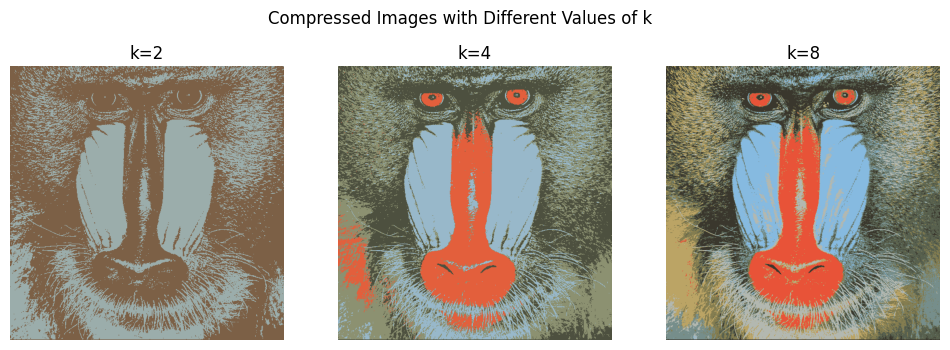

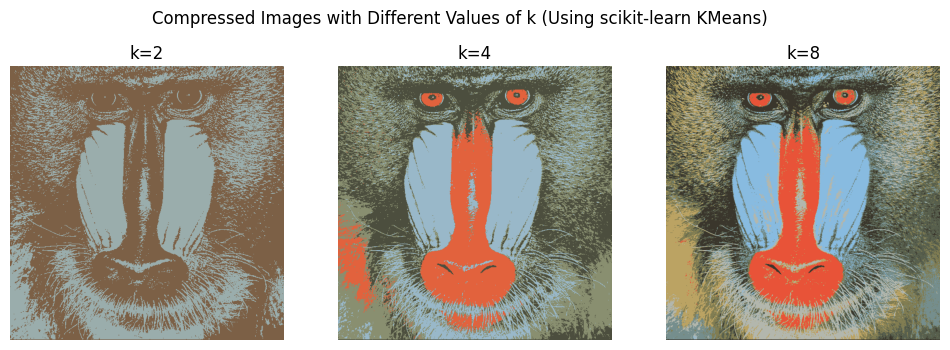

In [3]:
# QUESTION 1

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

image = Image.open('test.png')
# Convert image to numpy array
image_np = np.array(image)
# Reshape the image to a 2D array of pixels
image_reshaped = image_np.reshape(-1, 3)
print(image_reshaped.shape)
# Shuffle the pixels
image_reshaped_sample = shuffle(image_reshaped, random_state=0)[:image_reshaped.shape[0]]

# TASK (a)

def computeCentroid(features):
    num_features = len(features)
    dimension = len(features[0])
    # Initialize a list to accumulate the sum of each dimension
    centroid = [0] * dimension

    # Sum up each dimension separately
    for feature in features:
        for i in range(dimension):
            centroid[i] += feature[i]

    # Calculate the mean for each dimension
    for i in range(dimension):
        centroid[i] /= num_features

    # Return the centroid as a tuple
    return tuple(centroid)

# Compute the centroid of the image
centroid = computeCentroid(image_reshaped)

# Print the centroid
print("Centroid:", centroid)

# TASK (b)

def mykmeans(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)] #random centroids generated
    while True:
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)   # Assign each data point to the nearest centroid
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # Stopping condn
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids 

# TASK (c)

def compress_image(image, centroids, labels):
    compressed_image = centroids[labels]
    compressed_image = compressed_image.astype(np.uint8)
    compressed_image = compressed_image.reshape(image.shape)
    return compressed_image

# Define different values of k
k_values = [2, 4, 8]

# Create a figure to display images
plt.figure(figsize=(12, 4))

# Perform k-means for each value of k using mykmeans
for i, k in enumerate(k_values):
    centroids = mykmeans(image_reshaped, k)
    labels = np.argmin(np.linalg.norm(image_reshaped[:, np.newaxis] - centroids, axis=2), axis=1)
    compressed_image = compress_image(image_np, centroids, labels)
    # Add subplot for each compressed image
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(compressed_image)
    plt.title(f'k={k}')
    plt.axis('off')

plt.suptitle('Compressed Images with Different Values of k')
# Show the figure with all compressed images
plt.show()

# TASK (d)

# Create a figure to display images
plt.figure(figsize=(12, 4))

# Perform k-means for each value of k using scikit-learn implementation
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(image_reshaped)
    centroids = kmeans.cluster_centers_
    compressed_image = centroids[labels].reshape(image_np.shape)
    # Add subplot for each compressed image
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(compressed_image.astype(np.uint8))
    plt.title(f'k={k}')
    plt.axis('off')

# Add a title to the figure
plt.suptitle('Compressed Images with Different Values of k (Using scikit-learn KMeans)')

# Show the figure with all compressed images
plt.show()


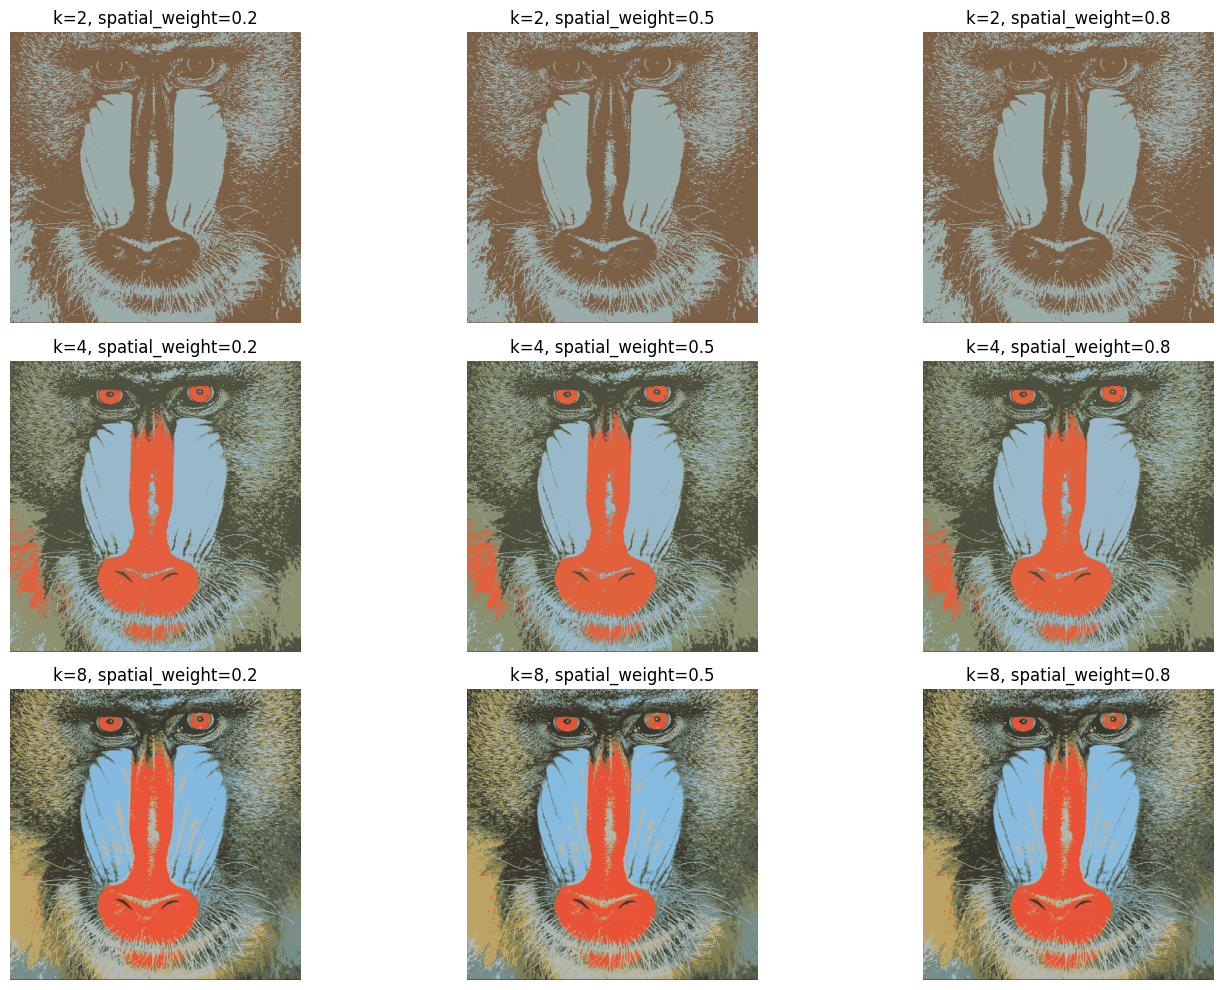

In [19]:
# Task (e):

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io

def spatial_coherence_clustering(image, k, spatial_weight=0.5):
    # Flatten the image into a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Get the spatial coordinates of each pixel
    h, w, _ = image.shape
    spatial_coords = np.array([[i, j] for i in range(h) for j in range(w)])

    # Normalize spatial coordinates to [0, 1]
    spatial_coords_norm = spatial_coords / max(h, w)

    # Combine color and spatial coordinates
    combined_features = np.concatenate([pixels, spatial_weight * spatial_coords_norm], axis=1)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(combined_features)

    # Reconstruct the image based on cluster centroids
    reconstructed_image = np.zeros_like(pixels)
    for i in range(k):
        cluster_mean_color = kmeans.cluster_centers_[i][:3]
        cluster_pixels_indices = np.where(labels == i)
        reconstructed_image[cluster_pixels_indices] = cluster_mean_color

    # Reshape the reconstructed image to the original shape
    reconstructed_image = reconstructed_image.reshape(image.shape)

    return reconstructed_image

# Load the test image
image = io.imread('test.png')

# Define values of k and spatial_weight to test
k_values = [2, 4, 8]
spatial_weights = [0.2, 0.5, 0.8]  # Adjust as needed

# Plot original image
plt.figure(figsize=(15, 10))

# # Plot original image in the first row
# plt.subplot(2, len(k_values), 1)
# plt.imshow(image)
# plt.title('Original Image')
# plt.axis('off')

# Loop over each combination of k and spatial_weight
for i, k in enumerate(k_values):
    for j, spatial_weight in enumerate(spatial_weights):
        # Plot compressed images in subsequent rows
        index = i * len(spatial_weights) + j + 1
        plt.subplot(3, len(k_values), index)
        compressed_image = spatial_coherence_clustering(image, k, spatial_weight)
        plt.imshow(compressed_image)
        plt.title(f'k={k}, spatial_weight={spatial_weight}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
# QUESTION 2

# Task 1 (a)

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

iris = datasets.load_iris(as_frame = True)
# print(iris)
# Extract petal length and petal width features
X = iris.data[['petal length (cm)', 'petal width (cm)']]
# Extract target classes
y = iris.target

# Filter data to include only 'setosa' and 'versicolor' classes
X_filtered = X[y != 2]
y_filtered = y[y != 2]
# print(X_filtered)

# Normalization
X_mean = np.mean(X_filtered, axis=0)
X_std = np.std(X_filtered, axis=0)
X_normalized = (X_filtered - X_mean) / X_std

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_filtered, test_size=0.2, random_state=55)

print("Shapes after filtering and splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes after filtering and splitting:
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


c:\Users\Anushka\miniconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Anushka\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


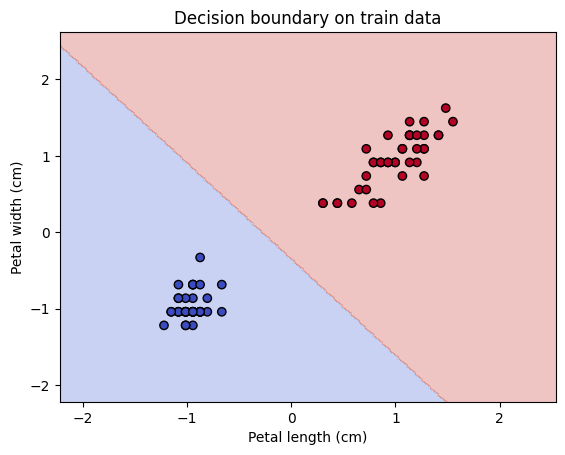

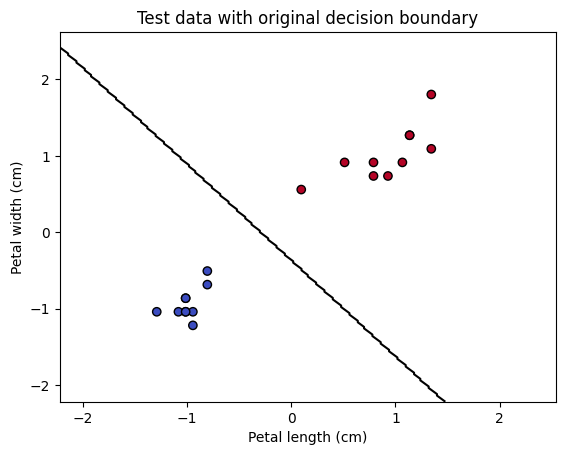

In [23]:
#Task 1(b):

# Train LinearSVC on the training data
clf = LinearSVC()
clf.fit(X_train, y_train)

# Plot decision boundary on the training data
x0_min, x0_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x1_min, x1_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                       np.arange(x1_min, x1_max, 0.02))
Z = clf.predict(np.c_[xx0.ravel(), xx1.ravel()])
Z = Z.reshape(xx0.shape)

# Plot decision boundary and training data
plt.contourf(xx0, xx1, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision boundary on train data')
plt.show()

# Generate scatterplot of the test data along with original decision boundary
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Test data with original decision boundary')

# Plot original decision boundary
plt.contour(xx0, xx1, Z, colors='k', linestyles=['-'], levels=[0])

plt.show()

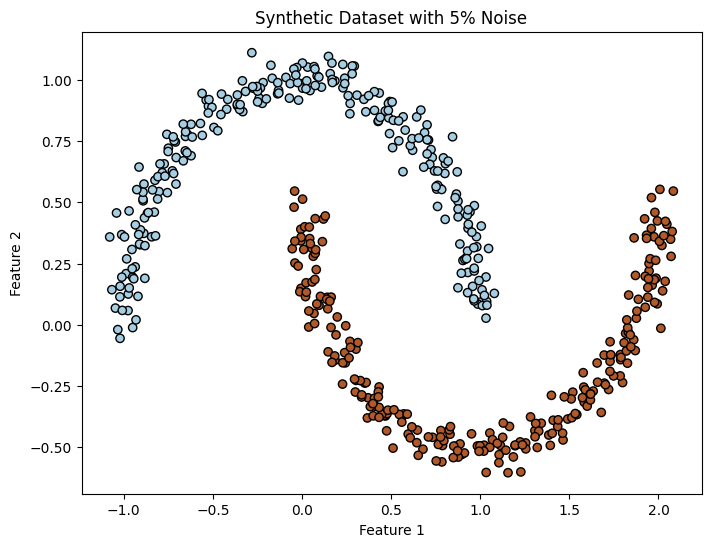

In [25]:
#Task 2(a)

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 500 data points and 5% noise
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with 5% Noise')
plt.show()

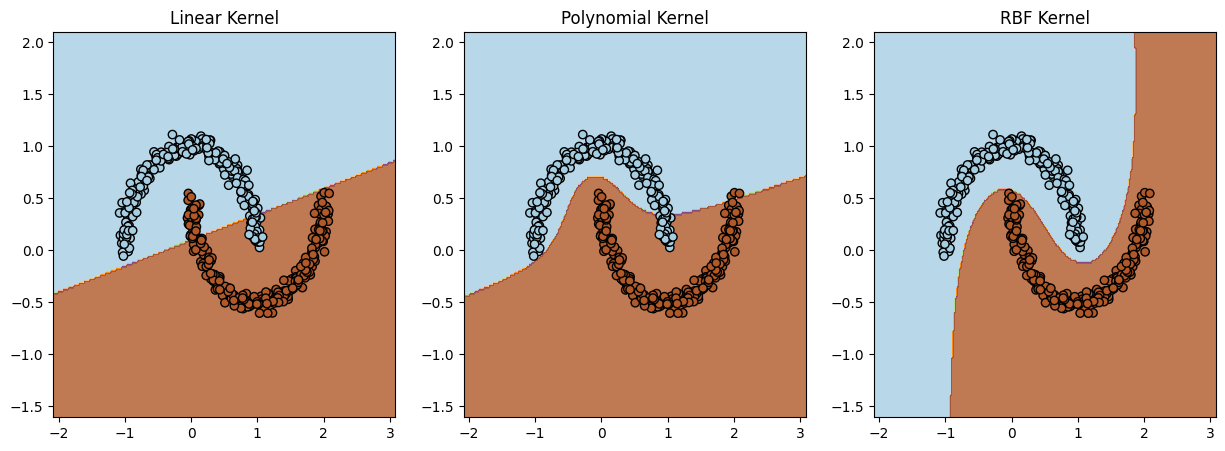

In [26]:
# Task 2(b):

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create meshgrid for plotting decision boundaries
def plot_decision_boundary(ax, clf, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree
svm_poly.fit(X_train, y_train)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='auto')  # You can adjust the gamma
svm_rbf.fit(X_train, y_train)

# Plot decision boundaries for each kernel
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_decision_boundary(axs[0], svm_linear, X, y, 'Linear Kernel')
plot_decision_boundary(axs[1], svm_poly, X, y, 'Polynomial Kernel')
plot_decision_boundary(axs[2], svm_rbf, X, y, 'RBF Kernel')
plt.show()


Best parameters: {'C': 0.1, 'gamma': 10}
Accuracy: 1.0


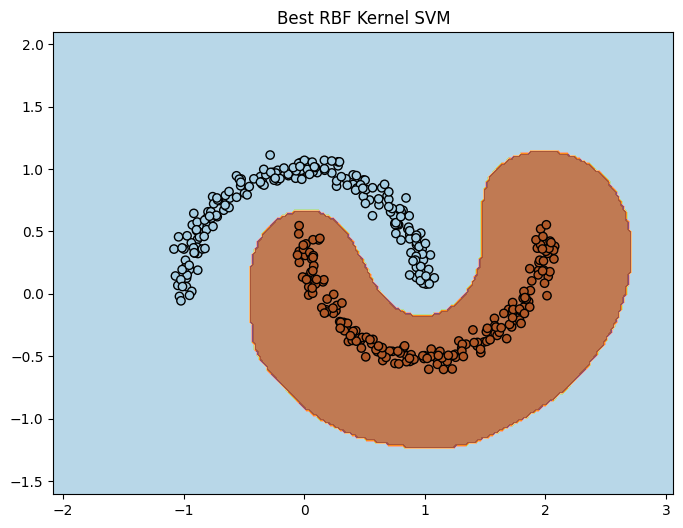

In [35]:
# Task 2(c)(d):

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10,50, 100]}

# Initialize the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Perform grid search
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict labels for test data using the best model
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary of the best model
plt.figure(figsize=(8, 6))
plot_decision_boundary(plt.gca(), best_model, X_train, y_train, 'Best RBF Kernel SVM')
plt.show()
